In [ ]:
pip install lifelines

In [ ]:
import pandas as pd
import numpy as np
from lifelines import CoxPHFitter
import matplotlib.pyplot as plt
from lifelines import KaplanMeierFitter
from lifelines.statistics import logrank_test
from datetime import datetime

In [ ]:
df = pd.read_csv(
    '/content/Query_Pesquisa_Verlaynne_PalmaresBaseDataConvertida.csv',
    encoding='ISO-8859-1',
    sep=';',
    quotechar='"',
    engine='python',        # mais tolerante com formatação ruim
    on_bad_lines='skip',    # ignora linhas corrompidas (opcional)
      # para prevenir warning de tipos mistos
)

In [ ]:
pd.set_option('display.max_columns', None)

In [ ]:
df.columns

Index(['Cod_Aluno', 'cod_matricula', 'Matricula', 'Cod_instituicao',
       'Desc_Instituicao', 'Cod_curso', 'DESCRICAO_CURSO',
       'Desc_Matriz_Curricular', 'Nivel_Ensino', 'Nível/Regime de Ensino',
       'Pólo Municipal', 'Qtd Períodos', 'Turno Ingresso', 'Turno',
       'Período Atual', 'Turma Atual', 'Per. Let. Ingresso',
       'Regime Internato', 'Desc_Modalidade_Curso', 'Sexo', 'Nascimento',
       'Naturalidade', 'Cor/Raça', 'Grupo Étnico',
       'Desc_Forma_Ingresso_Matricula', 'Cota', 'Renda Familiar',
       'Renda Familiar Per Capita', 'Renda Familiar Per Capita SIG',
       'Renda Familiar Per Capita PNP', 'Escola de Origem',
       'Area Procedência Escola Origem', 'C.E.P.', 'Cidade', 'Bairro',
       'Cod_cidade', 'Percentual Frequencia', 'Situação Matrícula',
       'Último Evento de Matrícula', 'Última Presença',
       'Sit. Últ. Per. Letivo', 'Coeficiente_Rendimento',
       'Ano_Conclusao_Ensino_Medio', 'Dt_Conclusao_Curso',
       'necessidades_especiais', 'N_

In [ ]:
df.head()

,Cod_Aluno,cod_matricula,Matricula,Cod_instituicao,Desc_Instituicao,Cod_curso,DESCRICAO_CURSO,Desc_Matriz_Curricular,Nivel_Ensino,Nível/Regime de Ensino,Pólo Municipal,Qtd Períodos,Turno Ingresso,Turno,Período Atual,Turma Atual,Per. Let. Ingresso,Regime Internato,Desc_Modalidade_Curso,Sexo,Nascimento,Naturalidade,Cor/Raça,Grupo Étnico,Desc_Forma_Ingresso_Matricula,Cota,Renda Familiar,Renda Familiar Per Capita,Renda Familiar Per Capita SIG,Renda Familiar Per Capita PNP,Escola de Origem,Area Procedência Escola Origem,C.E.P.,Cidade,Bairro,Cod_cidade,Percentual Frequencia,Situação Matrícula,Último Evento de Matrícula,Última Presença,Sit. Últ. Per. Letivo,Coeficiente_Rendimento,Ano_Conclusao_Ensino_Medio,Dt_Conclusao_Curso,necessidades_especiais,N_Membros_Familia,Desc_Estado_Civil,Cod_Nacionalidade,EIXO_TECNOLÓGICO,MODALIDADE_ENSINO
0,32516,31120,0615431,1,IFPE - CAMPUS RECIFE,30,ANÁLISE E DESENVOLVIMENTO DE SISTEMAS,85TECNOLOGIA EM SISTEMAS DE INFORMACAO (2001/2),Superior,Tecnólogo,NaN,5.0,Vespertino,Vespertino,0,NaN,2006/1,Não Internos,Tecnólogo,M,06/12/1975,RECIFE - PE,Branca,NaN,Vestibular/exame de Seleção,Não possui cota,1 a 2 salários,NaN,NaN,NaN,Pública Estadual,NaN,52191-000,RECIFE - PE,CASA AMARELA,5389.0,NaN,Matriculado,Renovou matrícula:,NaN,NaN,0,NaN,NaN,NaN,NaN,CASADO (A),BR,NaN,Presencial
1,33560,32164,0615438,1,IFPE - CAMPUS RECIFE,30,ANÁLISE E DESENVOLVIMENTO DE SISTEMAS,85TECNOLOGIA EM SISTEMAS DE INFORMACAO (2001/2),Superior,Tecnólogo,NaN,5.0,Vespertino,Vespertino,4,20091.Y5-RC.4V,2006/1,Não Internos,Tecnólogo,M,06/12/1975,RECIFE - PE,Branca,NaN,Vestibular/exame de Seleção,Não possui cota,2 a 3 salários,NaN,NaN,NaN,Privada,NaN,52191-000,RECIFE - PE,CASA AMARELA,5389.0,NaN,Abandono/Evasão,Desistência (Evasão): 19/08/2010,NaN,Abandonou/Evadiu,"1,88",1994,NaN,NaN,NaN,CASADO (A),BR,NaN,Presencial
2,35874,34477,0725401,1,IFPE - CAMPUS RECIFE,30,ANÁLISE E DESENVOLVIMENTO DE SISTEMAS,299CURSO SUPERIOR DE TECNOLOGIA EM ANÁLISE E D...,Superior,Tecnólogo,NaN,5.0,Vespertino,Vespertino,5,20092.Y5-RC.5V,2007/2,Não Internos,Tecnólogo,F,05/06/1980,RECIFE - PE,Branca,NaN,Vestibular/exame de Seleção,Não possui cota,5 a 10 salários,NaN,RFP > 3 SM,NaN,Pública Municipal,Urbana,NaN,RECIFE - PE,IPUTINGA,5389.0,95,Formado,Concluiu: 12/01/2010,NaN,Aprovado,"7,73",1997,12/01/2010,Condutas Típicas,NaN,CASADO (A),BR,NaN,Presencial
3,35875,34478,0725402,1,IFPE - CAMPUS RECIFE,30,ANÁLISE E DESENVOLVIMENTO DE SISTEMAS,85TECNOLOGIA EM SISTEMAS DE INFORMACAO (2001/2),Superior,Tecnólogo,NaN,5.0,Matutino,Matutino,0,20111.Y6-RC.3M,2007/2,Não Internos,Tecnólogo,M,24/04/1984,ARACAJU - SE,Branca,NaN,Vestibular/exame de Seleção,Não possui cota,5 a 10 salários,NaN,NaN,NaN,Privada,NaN,NaN,RECIFE - PE,IBURA UR-02,5389.0,75,Formado,Concluiu: 09/07/2011,28/06/2011,Aprovado,"5,98",2001,09/07/2011,NaN,NaN,SOLTEIRO (A),BR,NaN,Presencial
4,25758,24362,0225401,1,IFPE - CAMPUS RECIFE,30,ANÁLISE E DESENVOLVIMENTO DE SISTEMAS,85TECNOLOGIA EM SISTEMAS DE INFORMACAO (2001/2),Superior,Tecnólogo,NaN,5.0,Vespertino,Vespertino,1,NaN,2002/2,Não Internos,Tecnólogo,I,07/06/1982,RIO DE JANEIRO - RJ,Branca,NaN,Vestibular/exame de Seleção,Não possui cota,1 a 2 salários,NaN,NaN,NaN,Pública Estadual,NaN,NaN,RECIFE - PE,NaN,5389.0,NaN,Abandono/Evasão,Desistência (Evasão): 22/11/2017,NaN,Abandonou/Evadiu,"1,38",1999,NaN,NaN,NaN,NaN,BR,NaN,Presencial


In [ ]:
df.shape

(16264, 50)

In [ ]:
# Ler os cod_matricula do arquivo txt
with open('cod_matriculas_negativos.txt', 'r') as f:
    lista_cod_matricula = [line.strip() for line in f]

# Converter para int se necessário
lista_cod_matricula = [int(cod) for cod in lista_cod_matricula]

# Remover as linhas do DataFrame que possuem esses cod_matricula
df = df[~df['cod_matricula'].isin(lista_cod_matricula)]

# Exibir resultado Com Alunos Formatos
display(df)


,Cod_Aluno,cod_matricula,Matricula,Cod_instituicao,Desc_Instituicao,Cod_curso,DESCRICAO_CURSO,Desc_Matriz_Curricular,Nivel_Ensino,Nível/Regime de Ensino,Pólo Municipal,Qtd Períodos,Turno Ingresso,Turno,Período Atual,Turma Atual,Per. Let. Ingresso,Regime Internato,Desc_Modalidade_Curso,Sexo,Nascimento,Naturalidade,Cor/Raça,Grupo Étnico,Desc_Forma_Ingresso_Matricula,Cota,Renda Familiar,Renda Familiar Per Capita,Renda Familiar Per Capita SIG,Renda Familiar Per Capita PNP,Escola de Origem,Area Procedência Escola Origem,C.E.P.,Cidade,Bairro,Cod_cidade,Percentual Frequencia,Situação Matrícula,Último Evento de Matrícula,Última Presença,Sit. Últ. Per. Letivo,Coeficiente_Rendimento,Ano_Conclusao_Ensino_Medio,Dt_Conclusao_Curso,necessidades_especiais,N_Membros_Familia,Desc_Estado_Civil,Cod_Nacionalidade,EIXO_TECNOLÓGICO,MODALIDADE_ENSINO
0,32516,31120,0615431,1,IFPE - CAMPUS RECIFE,30,ANÁLISE E DESENVOLVIMENTO DE SISTEMAS,85TECNOLOGIA EM SISTEMAS DE INFORMACAO (2001/2),Superior,Tecnólogo,NaN,5.0,Vespertino,Vespertino,0,NaN,2006/1,Não Internos,Tecnólogo,M,06/12/1975,RECIFE - PE,Branca,NaN,Vestibular/exame de Seleção,Não possui cota,1 a 2 salários,NaN,NaN,NaN,Pública Estadual,NaN,52191-000,RECIFE - PE,CASA AMARELA,5389.0,NaN,Matriculado,Renovou matrícula:,NaN,NaN,0,NaN,NaN,NaN,NaN,CASADO (A),BR,NaN,Presencial
1,33560,32164,0615438,1,IFPE - CAMPUS RECIFE,30,ANÁLISE E DESENVOLVIMENTO DE SISTEMAS,85TECNOLOGIA EM SISTEMAS DE INFORMACAO (2001/2),Superior,Tecnólogo,NaN,5.0,Vespertino,Vespertino,4,20091.Y5-RC.4V,2006/1,Não Internos,Tecnólogo,M,06/12/1975,RECIFE - PE,Branca,NaN,Vestibular/exame de Seleção,Não possui cota,2 a 3 salários,NaN,NaN,NaN,Privada,NaN,52191-000,RECIFE - PE,CASA AMARELA,5389.0,NaN,Abandono/Evasão,Desistência (Evasão): 19/08/2010,NaN,Abandonou/Evadiu,"1,88",1994,NaN,NaN,NaN,CASADO (A),BR,NaN,Presencial
2,35874,34477,0725401,1,IFPE - CAMPUS RECIFE,30,ANÁLISE E DESENVOLVIMENTO DE SISTEMAS,299CURSO SUPERIOR DE TECNOLOGIA EM ANÁLISE E D...,Superior,Tecnólogo,NaN,5.0,Vespertino,Vespertino,5,20092.Y5-RC.5V,2007/2,Não Internos,Tecnólogo,F,05/06/1980,RECIFE - PE,Branca,NaN,Vestibular/exame de Seleção,Não possui cota,5 a 10 salários,NaN,RFP > 3 SM,NaN,Pública Municipal,Urbana,NaN,RECIFE - PE,IPUTINGA,5389.0,95,Formado,Concluiu: 12/01/2010,NaN,Aprovado,"7,73",1997,12/01/2010,Condutas Típicas,NaN,CASADO (A),BR,NaN,Presencial
3,35875,34478,0725402,1,IFPE - CAMPUS RECIFE,30,ANÁLISE E DESENVOLVIMENTO DE SISTEMAS,85TECNOLOGIA EM SISTEMAS DE INFORMACAO (2001/2),Superior,Tecnólogo,NaN,5.0,Matutino,Matutino,0,20111.Y6-RC.3M,2007/2,Não Internos,Tecnólogo,M,24/04/1984,ARACAJU - SE,Branca,NaN,Vestibular/exame de Seleção,Não possui cota,5 a 10 salários,NaN,NaN,NaN,Privada,NaN,NaN,RECIFE - PE,IBURA UR-02,5389.0,75,Formado,Concluiu: 09/07/2011,28/06/2011,Aprovado,"5,98",2001,09/07/2011,NaN,NaN,SOLTEIRO (A),BR,NaN,Presencial
4,25758,24362,0225401,1,IFPE - CAMPUS RECIFE,30,ANÁLISE E DESENVOLVIMENTO DE SISTEMAS,85TECNOLOGIA EM SISTEMAS DE INFORMACAO (2001/2),Superior,Tecnólogo,NaN,5.0,Vespertino,Vespertino,1,NaN,2002/2,Não Internos,Tecnólogo,I,07/06/1982,RIO DE JANEIRO - RJ,Branca,NaN,Vestibular/exame de Seleção,Não possui cota,1 a 2 salários,NaN,NaN,NaN,Pública Estadual,NaN,NaN,RECIFE - PE,NaN,5389.0,NaN,Abandono/Evasão,Desistência (Evasão): 22/11/2017,NaN,Abandonou/Evadiu,"1,38",1999,NaN,NaN,NaN,NaN,BR,NaN,Presencial
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16259,177113,195053,20201CGOL0017,26,IFPE - CAMPUS OLINDA,1531,TÉCNICO EM COMPUTAÇÃO GRÁFICA,3680CURSO TÉCNICO EM COMPUTAÇÃO GRÁFICA - SUB ...,Técnico,Subseqüente,NaN,3.0,Matutino,Matutino,3,20212.CGOL.3M - EXTRA,2020/1,Não Internos,Subseqüente,F,06/09/2001,RECIFE - PE,Parda,NaN,"Vestibular - Cotista Ep (r <= 1,5 Sm / Outras)...","Aluno de Escola Pública com renda <= 1,5 SM po...",1 a 2 salários,Menos de 1 salário mínimo,NaN,"1,0<RFP<=

In [ ]:
df.shape #REMOÇÃO CONCLUIDA COM SUCESSO

(16156, 50)

In [ ]:
print(df['Per. Let. Ingresso'].unique())

#print("Min:", df['Per. Let. Ingresso'].min())
#print("Max:", df['Per. Let. Ingresso'].max())

['2006/1' '2007/2' '2002/2' '2001/2' '2006/2' '2005/1' '2008/1' '2015/2'
 '2008/2' '2013/1' '2015/1' '2020/1' '2021/1' '2011/2' '2012/2' '2023/1'
 '2024/2' '2018/2' '2022/1' '2014/1' '2024/1' '2022/2' '2018/1' '2010/1'
 '2013/2' '2017/2' '2019/1' '2016/1' '2021/2' '2025/1' '2016/2' '2010/2'
 '2012/1' '2023/2' '2020/2' '2009/2' '2019/2' '2011/1' '2017/1' '2014/2'
 '2003/1']


In [ ]:
df['Situação Matrícula'].unique()

array(['Matriculado', 'Abandono/Evasão', 'Formado',
       'Cancelamento Voluntário', 'Aguardando ENADE', 'Concluído',
       'Jubilado', 'Aguardando Colação de Grau', 'Concludente',
       'Trancado', 'Cancelamento Compulsório', 'Transferido Externo',
       'Estagiario (Concludente)', 'Transferido Interno',
       'Matrícula Vínculo Institucional', 'Falecido',
       'Projeto Final (Concludente)'], dtype=object)

In [ ]:
print(df['DESCRICAO_CURSO'].unique())


['ANÁLISE E DESENVOLVIMENTO DE SISTEMAS'
 'TÉCNICO EM MANUTENÇÃO E SUPORTE EM INFORMÁTICA'
 'TÉCNICO EM INFORMÁTICA PARA INTERNET' 'OPERADOR DE COMPUTADOR'
 'ENGENHARIA DE SOFTWARE' 'TÉCNICO EM INFORMÁTICA'
 'LICENCIATURA EM COMPUTAÇÃO' 'TÉCNICO EM DESENVOLVIMENTO DE SISTEMAS'
 'SISTEMAS PARA INTERNET' 'TÉCNICO EM REDES DE COMPUTADORES'
 'TÉCNICO EM COMPUTAÇÃO GRÁFICA']


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 16156 entries, 0 to 16263
Data columns (total 50 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Cod_Aluno                       16156 non-null  int64  
 1   cod_matricula                   16156 non-null  int64  
 2   Matricula                       16156 non-null  object 
 3   Cod_instituicao                 16156 non-null  int64  
 4   Desc_Instituicao                16156 non-null  object 
 5   Cod_curso                       16156 non-null  int64  
 6   DESCRICAO_CURSO                 16156 non-null  object 
 7   Desc_Matriz_Curricular          16156 non-null  object 
 8   Nivel_Ensino                    16156 non-null  object 
 9   Nível/Regime de Ensino          16156 non-null  object 
 10  Pólo Municipal                  1500 non-null   object 
 11  Qtd Períodos                    16054 non-null  float64
 12  Turno Ingresso                  16155

In [ ]:
df.shape

(16156, 50)

In [ ]:
df.columns

Index(['Cod_Aluno', 'cod_matricula', 'Matricula', 'Cod_instituicao',
       'Desc_Instituicao', 'Cod_curso', 'DESCRICAO_CURSO',
       'Desc_Matriz_Curricular', 'Nivel_Ensino', 'Nível/Regime de Ensino',
       'Pólo Municipal', 'Qtd Períodos', 'Turno Ingresso', 'Turno',
       'Período Atual', 'Turma Atual', 'Per. Let. Ingresso',
       'Regime Internato', 'Desc_Modalidade_Curso', 'Sexo', 'Nascimento',
       'Naturalidade', 'Cor/Raça', 'Grupo Étnico',
       'Desc_Forma_Ingresso_Matricula', 'Cota', 'Renda Familiar',
       'Renda Familiar Per Capita', 'Renda Familiar Per Capita SIG',
       'Renda Familiar Per Capita PNP', 'Escola de Origem',
       'Area Procedência Escola Origem', 'C.E.P.', 'Cidade', 'Bairro',
       'Cod_cidade', 'Percentual Frequencia', 'Situação Matrícula',
       'Último Evento de Matrícula', 'Última Presença',
       'Sit. Últ. Per. Letivo', 'Coeficiente_Rendimento',
       'Ano_Conclusao_Ensino_Medio', 'Dt_Conclusao_Curso',
       'necessidades_especiais', 'N_

In [ ]:
df['Sexo'].unique()

array(['M', 'F', 'I'], dtype=object)

In [ ]:
df['Nivel_Ensino'].unique()

array(['Superior', 'Técnico', 'Básico'], dtype=object)

In [ ]:
df['Situação Matrícula'].unique()

array(['Matriculado', 'Abandono/Evasão', 'Formado',
       'Cancelamento Voluntário', 'Aguardando ENADE', 'Concluído',
       'Jubilado', 'Aguardando Colação de Grau', 'Concludente',
       'Trancado', 'Cancelamento Compulsório', 'Transferido Externo',
       'Estagiario (Concludente)', 'Transferido Interno',
       'Matrícula Vínculo Institucional', 'Falecido',
       'Projeto Final (Concludente)'], dtype=object)

Básico= proeja. Optamos por não trabalhar com dados do proeja

In [ ]:
df = df[df['Nivel_Ensino'] != 'Básico']


In [ ]:
df.shape

(15307, 50)

In [ ]:
# Verificar tipos e nulos
df.info()
df.isnull().sum().sort_values(ascending=False)


<class 'pandas.core.frame.DataFrame'>
Index: 15307 entries, 0 to 16263
Data columns (total 50 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Cod_Aluno                       15307 non-null  int64  
 1   cod_matricula                   15307 non-null  int64  
 2   Matricula                       15307 non-null  object 
 3   Cod_instituicao                 15307 non-null  int64  
 4   Desc_Instituicao                15307 non-null  object 
 5   Cod_curso                       15307 non-null  int64  
 6   DESCRICAO_CURSO                 15307 non-null  object 
 7   Desc_Matriz_Curricular          15307 non-null  object 
 8   Nivel_Ensino                    15307 non-null  object 
 9   Nível/Regime de Ensino          15307 non-null  object 
 10  Pólo Municipal                  1500 non-null   object 
 11  Qtd Períodos                    15284 non-null  float64
 12  Turno Ingresso                  15306

,0
Grupo Étnico,15303
necessidades_especiais,15068
Pólo Municipal,13807
N_Membros_Familia,13500
Renda Familiar Per Capita SIG,12970
Percentual Frequencia,12703
Dt_Conclusao_Curso,12430
Renda Familiar,9651
Renda Familiar Per Capita PNP,9442
Area Procedência Escola Origem,7666


In [ ]:
df['Último Evento de Matrícula'].isna().sum()
# Filtrar e mostrar apenas as linhas onde 'Último Evento de Matrícula' está vazia
linhas_vazias = df[df['Último Evento de Matrícula'].isna()]
linhas_vazias.head()


,Cod_Aluno,cod_matricula,Matricula,Cod_instituicao,Desc_Instituicao,Cod_curso,DESCRICAO_CURSO,Desc_Matriz_Curricular,Nivel_Ensino,Nível/Regime de Ensino,Pólo Municipal,Qtd Períodos,Turno Ingresso,Turno,Período Atual,Turma Atual,Per. Let. Ingresso,Regime Internato,Desc_Modalidade_Curso,Sexo,Nascimento,Naturalidade,Cor/Raça,Grupo Étnico,Desc_Forma_Ingresso_Matricula,Cota,Renda Familiar,Renda Familiar Per Capita,Renda Familiar Per Capita SIG,Renda Familiar Per Capita PNP,Escola de Origem,Area Procedência Escola Origem,C.E.P.,Cidade,Bairro,Cod_cidade,Percentual Frequencia,Situação Matrícula,Último Evento de Matrícula,Última Presença,Sit. Últ. Per. Letivo,Coeficiente_Rendimento,Ano_Conclusao_Ensino_Medio,Dt_Conclusao_Curso,necessidades_especiais,N_Membros_Familia,Desc_Estado_Civil,Cod_Nacionalidade,EIXO_TECNOLÓGICO,MODALIDADE_ENSINO
8,34478,33082,0625401,1,IFPE - CAMPUS RECIFE,30,ANÁLISE E DESENVOLVIMENTO DE SISTEMAS,85TECNOLOGIA EM SISTEMAS DE INFORMACAO (2001/2),Superior,Tecnólogo,NaN,5.0,Vespertino,Vespertino,1,NaN,2006/2,Não Internos,Tecnólogo,M,NaN,RECIFE - PE,Branca,NaN,Vestibular/exame de Seleção,Não possui cota,1 a 2 salários,NaN,NaN,NaN,Pública Estadual,NaN,NaN,RECIFE - PE,NaN,5389.0,NaN,Cancelamento Voluntário,NaN,NaN,Matriculado,0,NaN,NaN,NaN,NaN,NaN,BR,NaN,Presencial
44,37281,35884,0815402,1,IFPE - CAMPUS RECIFE,30,ANÁLISE E DESENVOLVIMENTO DE SISTEMAS,299CURSO SUPERIOR DE TECNOLOGIA EM ANÁLISE E D...,Superior,Tecnólogo,NaN,5.0,Vespertino,Vespertino,1,NaN,2008/1,Não Internos,Tecnólogo,M,26/02/1975,PAULO AFONSO - BA,Branca,NaN,Vestibular/exame de Seleção,Não possui cota,1 a 2 salários,NaN,NaN,NaN,Pública Estadual,NaN,NaN,RECIFE - PE,UR 1 IBURA,5389.0,NaN,Abandono/Evasão,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,SOLTEIRO (A),BR,NaN,Presencial
1342,35908,34511,0725435,1,IFPE - CAMPUS RECIFE,30,ANÁLISE E DESENVOLVIMENTO DE SISTEMAS,85TECNOLOGIA EM SISTEMAS DE INFORMACAO (2001/2),Superior,Tecnólogo,NaN,5.0,Vespertino,Vespertino,5,20092.Y5-RC.5V,2007/2,Não Internos,Tecnólogo,M,27/04/1986,RECIFE - PE,Branca,NaN,Vestibular/exame de Seleção,Não possui cota,2 a 3 salários,NaN,"RFP <= 0,5 SM",NaN,Privada,Urbana,54430-000,JABOATÃO DOS GUARARAPES - PE,CANDEIAS,5288.0,"91,02564103",Concluído,NaN,NaN,Aprovado,"7,99",2003,NaN,Condutas Típicas,NaN,CASADO (A),BR,NaN,Presencial
3053,67658,67121,20101B11-VT0026,5,IFPE - CAMPUS VITÓRIA DE SANTO ANTÃO,258,TÉCNICO EM MANUTENÇÃO E SUPORTE EM INFORMÁTICA,1209TÉCNICO EM MANUTENÇÃO E SUPORTE EM INFORMÁ...,Técnico,Integrado,NaN,2.0,Integral,Integral,1,NaN,2010/1,Não Internos,Integrado,F,06/06/1972,VITÓRIA DE SANTO ANTÃO - PE,Parda,NaN,Vestibular/exame de Seleção,Não possui cota,NaN,NaN,NaN,NaN,NaN,NaN,55618-000,VITÓRIA DE SANTO ANTÃO - PE,Pirituba,5486.0,NaN,Abandono/Evasão,NaN,NaN,Matriculado,0,NaN,NaN,NaN,NaN,SEPARADOS,BR,Informação e Comunicação,Presencial
5296,80627,81249,20112D11-GR0562,8,IFPE - CAMPUS GARANHUNS,301,TÉCNICO EM INFORMÁTICA,1298TÉCNICO EM INFORMÁTICA SUBSEQUENTE - GARAN...,Técnico,Subseqüente,NaN,3.0,Noturno,Noturno,1,20122.D11-GR.1N,2011/2,Não Internos,Subseqüente,M,10/01/1977,PALMEIRINA - PE,Parda,NaN,Vestibular - Não Cotista,Não possui cota,NaN,NaN,NaN,NaN,NaN,NaN,55612-120,VITÓRIA DE SANTO ANTÃO - PE,Redenção,5486.0,NaN,Cancelamento Voluntário,NaN,NaN,NaN,"4,61",2000,NaN,NaN,NaN,SOLTEIRO (A),BR,Informação e Comunicação,Presencial


In [ ]:
df['Per. Let. Ingresso'].value_counts()



,count
Per. Let. Ingresso,
2023/1,976
2015/1,889
2024/1,867
2021/1,797
2020/1,771
2022/1,751
2025/1,747
2019/1,668
2017/1,646


In [ ]:
 df['Dt_Conclusao_Curso'].value_counts()

,count
Dt_Conclusao_Curso,
29/12/2017,80
31/12/2022,57
28/12/2018,57
29/12/2015,47
29/12/2023,47
...,...
30/08/2022,1
03/07/2017,1
22/12/2016,1


In [ ]:
import pandas as pd
import numpy as np
import re

# ===============================
# 1. Situações de interesse
# ===============================
situacoes_desejadas = [
    'Matriculado', 'Aguardando ENADE', 'Concludente', 'Concluído', 'Estagiario (Concludente)',
    'Projeto Final (Concludente)', 'Trancado', 'Matrícula Vínculo Institucional',
    'Formado', 'concluido', 'Aguardando Colação de Grau'
]

situacoes_evasao = [
    'Abandono/Evasão', 'Cancelamento Voluntário', 'Cancelamento Compulsório',
    'Falecido', 'Transferido Interno', 'Transferido Externo', 'Jubilado'
]

# ===============================
# 2. DATAS
# ===============================

# Converter colunas de data
df['Dt_Conclusao_Curso'] = pd.to_datetime(df['Dt_Conclusao_Curso'], dayfirst=True, errors='coerce')
df['Per. Let. Ingresso'] = pd.to_datetime(df['Per. Let. Ingresso'], dayfirst=True, errors='coerce')
df.rename(columns={'Per. Let. Ingresso': 'Data_Ingresso'}, inplace=True)

# Criar cópia da data de conclusão
df['Copia_Dt_Conclusao_Curso'] = df['Dt_Conclusao_Curso']

# Preencher 06/2025 para casos "sobreviventes" sem data
mascara_sobreviventes = df['Situação Matrícula'].str.lower().isin([s.lower() for s in situacoes_desejadas]) & df['Copia_Dt_Conclusao_Curso'].isna()
df.loc[mascara_sobreviventes, 'Copia_Dt_Conclusao_Curso'] = pd.Timestamp('2025-06-01')

# Extrair data do texto de último evento (casos de evasão)
def extrair_data_texto(texto):
    if pd.isna(texto):
        return pd.NaT
    match = re.search(r'\d{2}/\d{2}/\d{4}', str(texto))
    if match:
        return pd.to_datetime(match.group(0), dayfirst=True, errors='coerce')
    return pd.NaT

df['Data_Ultimo_Evento'] = df['Último Evento de Matrícula'].apply(extrair_data_texto)

# Preencher data para casos de evasão
mascara_evasao = df['Situação Matrícula'].isin(situacoes_evasao) & df['Copia_Dt_Conclusao_Curso'].isna()
df.loc[mascara_evasao, 'Copia_Dt_Conclusao_Curso'] = df.loc[mascara_evasao, 'Data_Ultimo_Evento']

# Garantir datetime nas datas finais
df['Copia_Dt_Conclusao_Curso'] = pd.to_datetime(df['Copia_Dt_Conclusao_Curso'], errors='coerce')
df['Data_Ingresso'] = pd.to_datetime(df['Data_Ingresso'], errors='coerce')

# ===============================
# 3. TEMPO (Meses Matriculado)
# ===============================
def calcular_meses(data_inicio, data_fim):
    if pd.isna(data_inicio) or pd.isna(data_fim):
        return np.nan
    return (data_fim.year - data_inicio.year) * 12 + (data_fim.month - data_inicio.month)

df['MesesMatriculado'] = df.apply(
    lambda row: calcular_meses(row['Data_Ingresso'], row['Copia_Dt_Conclusao_Curso']),
    axis=1
)

# ===============================
# 4. EVENTO (0 = censura, 1 = evasão)
# ===============================
df['evento'] = df['Situação Matrícula'].isin(situacoes_evasao).astype(int)

# ===============================
# 5. FILTRO de alunos que excederam o tempo esperado (2x duração)
# ===============================
df['Qtd Períodos'] = pd.to_numeric(df['Qtd Períodos'], errors='coerce').fillna(0)

cond_integrado = df['Qtd Períodos'] <= 4
df['LimiteMaximoMeses'] = np.where(
    cond_integrado,
    df['Qtd Períodos'] * 12 * 2,
    df['Qtd Períodos'] * 6 * 2
)

# Exportar os excluídos por tempo
df_excluidos = df[df['MesesMatriculado'] > df['LimiteMaximoMeses']].copy()

# Filtrar base final
df = df[df['MesesMatriculado'] <= df['LimiteMaximoMeses']].copy()

# ===============================
# 6. Exibir resultado final
# ===============================
print("Total de registros:", len(df))
print("Excluídos por ultrapassar tempo máximo:", len(df_excluidos))
#print("Registros finais para análise:", len(df_final))
#print(df_final[['Cod_Aluno', 'MesesMatriculado', 'evento']].head())


/tmp/ipython-input-214-2454995880.py:25: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['Per. Let. Ingresso'] = pd.to_datetime(df['Per. Let. Ingresso'], dayfirst=True, errors='coerce')


Total de registros: 14587
Excluídos por ultrapassar tempo máximo: 716


In [ ]:
df.shape

(14587, 55)

In [ ]:
df_excluidos.shape

(716, 55)

In [ ]:
df['LimiteMaximoMeses']

,LimiteMaximoMeses
1,60.0
2,60.0
3,60.0
9,60.0
12,60.0
...,...
16259,72.0
16260,72.0
16261,72.0
16262,72.0


In [ ]:
df['Data_Ingresso'].value_counts()

,count
Data_Ingresso,
2023-01-01,976
2024-01-01,867
2015-01-01,851
2021-01-01,797
2020-01-01,754
2022-01-01,751
2025-01-01,747
2019-01-01,646
2017-01-01,613


In [ ]:
df['Copia_Dt_Conclusao_Curso'].value_counts()

,count
Copia_Dt_Conclusao_Curso,
2025-06-01,3340
2017-11-23,347
2016-04-07,154
2015-08-06,98
2021-01-04,87
...,...
2007-12-31,1
2012-08-02,1
2018-01-10,1


In [ ]:
# Verifique os casos com meses negativos
negativos = df[df['MesesMatriculado'] < 0][['Cod_Aluno', 'Data_Ingresso', 'Copia_Dt_Conclusao_Curso', 'MesesMatriculado']]
print(f"Registros com tempo negativo: {len(negativos)}")
display(negativos.head())


Registros com tempo negativo: 0


,Cod_Aluno,Data_Ingresso,Copia_Dt_Conclusao_Curso,MesesMatriculado


In [ ]:
# Filtrar registros com tempo negativo
df_negativos = df[df['MesesMatriculado'] < 0][['Cod_Aluno', 'cod_matricula', 'Data_Ingresso', 'Copia_Dt_Conclusao_Curso', 'MesesMatriculado']]

# Exibir resultado
print(f"Total de registros com MesesMatriculado negativo: {len(df_negativos)}")
display(df_negativos)


Total de registros com MesesMatriculado negativo: 0


,Cod_Aluno,cod_matricula,Data_Ingresso,Copia_Dt_Conclusao_Curso,MesesMatriculado


In [ ]:
lista_cod_matricula = df_negativos['cod_matricula'].tolist()


In [ ]:
len(lista_cod_matricula)

0

In [ ]:
with open('cod_matriculas_negativos.txt', 'w') as f:
    for cod in lista_cod_matricula:
        f.write(str(cod) + '\n')


In [ ]:
# Passo 3 – Criar coluna "evento" com base na Situação Matrícula
sobrevivencia = [
    'Matriculado', 'Aguardando ENADE', 'Concludente', 'Concluído', 'Estagiario (Concludente)',
    'Projeto Final (Concludente)', 'Trancado', 'Matrícula Vínculo Institucional',
    'Formado', 'concluido', 'Aguardando Colação de Grau'
]
evento = [
    'Abandono/Evasão', 'Cancelamento Voluntário', 'Cancelamento Compulsório',
    'Falecido', 'Transferido Interno', 'Transferido Externo', 'Jubilado'
]
df['evento'] = df['Situação Matrícula'].apply(lambda x: 1 if x in evento else 0)

In [ ]:
print(df['MesesMatriculado'].isnull().sum())  # 'Data_Ingresso' 'Copia_Dt_Conclusao_Curso' Resolvi apagar pois esses 4 elementos só tinha a data_ingresso e nenhuma forma de validar sua evasão!
print()
df[df['MesesMatriculado'].isnull()]
df = df.dropna(subset=['MesesMatriculado'])
print(df['MesesMatriculado'].isnull().sum())

0

0


In [ ]:
df['MesesMatriculado']

,MesesMatriculado
1,55.0
2,35.0
3,53.0
9,33.0
12,53.0
...,...
16259,24.0
16260,21.0
16261,15.0
16262,14.0


In [ ]:
df['LimiteMaximoMeses'].max()

96.0

In [ ]:
df[df['MesesMatriculado'] > 96]


,Cod_Aluno,cod_matricula,Matricula,Cod_instituicao,Desc_Instituicao,Cod_curso,DESCRICAO_CURSO,Desc_Matriz_Curricular,Nivel_Ensino,Nível/Regime de Ensino,Pólo Municipal,Qtd Períodos,Turno Ingresso,Turno,Período Atual,Turma Atual,Data_Ingresso,Regime Internato,Desc_Modalidade_Curso,Sexo,Nascimento,Naturalidade,Cor/Raça,Grupo Étnico,Desc_Forma_Ingresso_Matricula,Cota,Renda Familiar,Renda Familiar Per Capita,Renda Familiar Per Capita SIG,Renda Familiar Per Capita PNP,Escola de Origem,Area Procedência Escola Origem,C.E.P.,Cidade,Bairro,Cod_cidade,Percentual Frequencia,Situação Matrícula,Último Evento de Matrícula,Última Presença,Sit. Últ. Per. Letivo,Coeficiente_Rendimento,Ano_Conclusao_Ensino_Medio,Dt_Conclusao_Curso,necessidades_especiais,N_Membros_Familia,Desc_Estado_Civil,Cod_Nacionalidade,EIXO_TECNOLÓGICO,MODALIDADE_ENSINO,Copia_Dt_Conclusao_Curso,Data_Ultimo_Evento,MesesMatriculado,evento,LimiteMaximoMeses


In [ ]:
print(df[df['MesesMatriculado'] < 0][['Cod_Aluno', 'Data_Ingresso', 'Copia_Dt_Conclusao_Curso', 'MesesMatriculado']])


Empty DataFrame
Columns: [Cod_Aluno, Data_Ingresso, Copia_Dt_Conclusao_Curso, MesesMatriculado]
Index: []


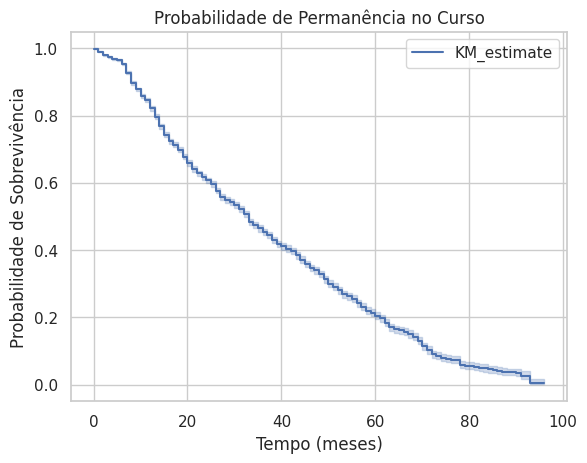

In [ ]:

from lifelines import KaplanMeierFitter
import matplotlib.pyplot as plt

# Instanciar o modelo
kmf = KaplanMeierFitter()

# Ajustar o modelo aos seus dados
kmf.fit(durations=df['MesesMatriculado'], event_observed=df['evento'])

# Plotar a curva de sobrevivência
kmf.plot_survival_function()
plt.title('Probabilidade de Permanência no Curso')
plt.ylabel('Probabilidade de Sobrevivência')
plt.xlabel('Tempo (meses)')
plt.grid(True)
plt.show()


In [ ]:
df['MesesMatriculado'].isnull().sum()

np.int64(0)

In [ ]:
df['evento'].isnull().sum()

np.int64(0)

In [ ]:
df.columns

Index(['Cod_Aluno', 'cod_matricula', 'Matricula', 'Cod_instituicao',
       'Desc_Instituicao', 'Cod_curso', 'DESCRICAO_CURSO',
       'Desc_Matriz_Curricular', 'Nivel_Ensino', 'Nível/Regime de Ensino',
       'Pólo Municipal', 'Qtd Períodos', 'Turno Ingresso', 'Turno',
       'Período Atual', 'Turma Atual', 'Data_Ingresso', 'Regime Internato',
       'Desc_Modalidade_Curso', 'Sexo', 'Nascimento', 'Naturalidade',
       'Cor/Raça', 'Grupo Étnico', 'Desc_Forma_Ingresso_Matricula', 'Cota',
       'Renda Familiar', 'Renda Familiar Per Capita',
       'Renda Familiar Per Capita SIG', 'Renda Familiar Per Capita PNP',
       'Escola de Origem', 'Area Procedência Escola Origem', 'C.E.P.',
       'Cidade', 'Bairro', 'Cod_cidade', 'Percentual Frequencia',
       'Situação Matrícula', 'Último Evento de Matrícula', 'Última Presença',
       'Sit. Últ. Per. Letivo', 'Coeficiente_Rendimento',
       'Ano_Conclusao_Ensino_Medio', 'Dt_Conclusao_Curso',
       'necessidades_especiais', 'N_Membros_Fami

In [ ]:
df.shape

(14587, 55)

In [ ]:
df = df.drop(columns=['Cod_Aluno', 'cod_matricula','Matricula','Cod_instituicao', 'Pólo Municipal', 'Turno Ingresso',
                      'Regime Internato', 'Grupo Étnico','Area Procedência Escola Origem','C.E.P.','Bairro','Cod_cidade',
                     'Percentual Frequencia', 'Ano_Conclusao_Ensino_Medio','necessidades_especiais','N_Membros_Familia', 'Cod_Nacionalidade','EIXO_TECNOLÓGICO',
                     'Renda Familiar', 'Renda Familiar Per Capita SIG', 'Renda Familiar Per Capita PNP', 'Cod_curso','Desc_Forma_Ingresso_Matricula','Última Presença'])

In [ ]:
df.shape

(14587, 31)

In [ ]:
df.columns

Index(['Desc_Instituicao', 'DESCRICAO_CURSO', 'Desc_Matriz_Curricular',
       'Nivel_Ensino', 'Nível/Regime de Ensino', 'Qtd Períodos', 'Turno',
       'Período Atual', 'Turma Atual', 'Data_Ingresso',
       'Desc_Modalidade_Curso', 'Sexo', 'Nascimento', 'Naturalidade',
       'Cor/Raça', 'Cota', 'Renda Familiar Per Capita', 'Escola de Origem',
       'Cidade', 'Situação Matrícula', 'Último Evento de Matrícula',
       'Sit. Últ. Per. Letivo', 'Coeficiente_Rendimento', 'Dt_Conclusao_Curso',
       'Desc_Estado_Civil', 'MODALIDADE_ENSINO', 'Copia_Dt_Conclusao_Curso',
       'Data_Ultimo_Evento', 'MesesMatriculado', 'evento',
       'LimiteMaximoMeses'],
      dtype='object')

In [ ]:
print("Nulos em MesesMatriculado:", df['MesesMatriculado'].isna().sum())
print("Nulos em evento:", df['evento'].isna().sum())


Nulos em MesesMatriculado: 0
Nulos em evento: 0


In [ ]:

# Filtrar e mostrar os 4 alunos com MesesMatriculado nulo
alunos_nulos = df[df['MesesMatriculado'].isna()]

# Exibir todas as colunas disponíveis desses alunos
pd.set_option('display.max_columns', None)  # Mostra todas as colunas
display(alunos_nulos)


,Desc_Instituicao,DESCRICAO_CURSO,Desc_Matriz_Curricular,Nivel_Ensino,Nível/Regime de Ensino,Qtd Períodos,Turno,Período Atual,Turma Atual,Data_Ingresso,Desc_Modalidade_Curso,Sexo,Nascimento,Naturalidade,Cor/Raça,Cota,Renda Familiar Per Capita,Escola de Origem,Cidade,Situação Matrícula,Último Evento de Matrícula,Sit. Últ. Per. Letivo,Coeficiente_Rendimento,Dt_Conclusao_Curso,Desc_Estado_Civil,MODALIDADE_ENSINO,Copia_Dt_Conclusao_Curso,Data_Ultimo_Evento,MesesMatriculado,evento,LimiteMaximoMeses


In [ ]:
df.shape

(14587, 31)

In [ ]:
df = pd.get_dummies(df, columns=['Sexo', 'Turno', 'Cota', 'Cor/Raça'], drop_first=True, prefix_sep='_')


In [ ]:
import pandas as pd

# Converter colunas para datetime
df['Nascimento'] = pd.to_datetime(df['Nascimento'], format='%d/%m/%Y', errors='coerce')
df['Data_Ingresso'] = pd.to_datetime(df['Data_Ingresso'], format='%d/%m/%Y', errors='coerce')

# Extrair ano de ingresso
df['Ano_Ingresso'] = df['Data_Ingresso'].dt.year

# Calcular idade no momento do ingresso
df['Idade_Ingresso'] = df['Data_Ingresso'].dt.year - df['Nascimento'].dt.year

# Exibir o resultado
display(df[[ 'Nascimento', 'Data_Ingresso', 'Ano_Ingresso', 'Idade_Ingresso']])


,Nascimento,Data_Ingresso,Ano_Ingresso,Idade_Ingresso
1,1975-12-06,2006-01-01,2006,31
2,1980-06-05,2007-02-01,2007,27
3,1984-04-24,2007-02-01,2007,23
9,1981-03-09,2007-02-01,2007,26
12,1983-11-04,2001-02-01,2001,18
...,...,...,...,...
16259,2001-09-06,2020-01-01,2020,19
16260,1997-11-11,2023-02-01,2023,26
16261,1997-06-09,2017-01-01,2017,20
16262,2002-06-04,2021-01-01,2021,19


In [ ]:
df.groupby(['Situação Matrícula', 'evento']).size().reset_index(name='Total')


,Situação Matrícula,evento,Total
0,Abandono/Evasão,1,6332
1,Aguardando Colação de Grau,0,12
2,Aguardando ENADE,0,3
3,Cancelamento Compulsório,1,27
4,Cancelamento Voluntário,1,1021
5,Concludente,0,95
6,Concluído,0,2630
7,Falecido,1,2
8,Formado,0,154
9,Jubilado,1,494


In [ ]:
# Passo 1: Substituir vírgula por ponto e converter
df['Coeficiente_Rendimento'] = (
    df['Coeficiente_Rendimento']
    .astype(str)
    .str.replace(',', '.')
    .replace('nan', np.nan)
    .astype(float)
)

# Passo 2: Verificar outliers
print("Estatísticas descritivas:")
print(df['Coeficiente_Rendimento'].describe())

Estatísticas descritivas:
count    14587.000000
mean         4.194191
std          3.319020
min          0.000000
25%          0.240000
50%          4.370000
75%          7.430000
max         10.000000
Name: Coeficiente_Rendimento, dtype: float64


In [ ]:

cols_raca = ['Cor/Raça_Branca', 'Cor/Raça_Parda', 'Cor/Raça_Preta', 'Cor/Raça_Indígena', 'Cor/Raça_Não dispõe da informação', 'Cor/Raça_Não quis declarar cor/raça']

def pega_raca(row):
    for col in cols_raca:
        if row[col] == 1:
            return col.replace('Cor/Raça_', '')
    return 'Desconhecido'

df['Cor_Raca_Grupo'] = df.apply(pega_raca, axis=1)


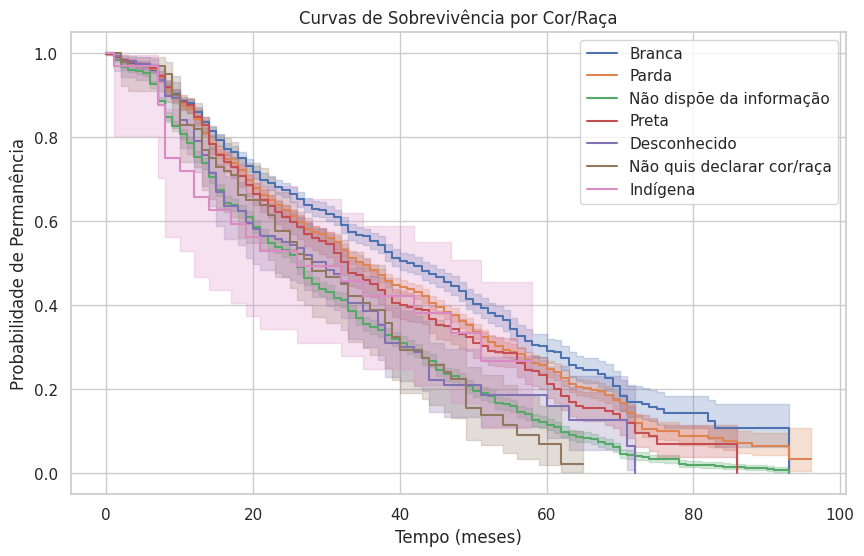

   test_statistic             p    -log2(p)
0      412.688797  5.225539e-86  283.300236
p-valor do teste log-rank multigrupos: 0.0000


In [ ]:
from lifelines import KaplanMeierFitter
from lifelines.statistics import multivariate_logrank_test
import matplotlib.pyplot as plt

grupos = df['Cor_Raca_Grupo'].unique()
kmf = KaplanMeierFitter()

plt.figure(figsize=(10,6))
for grupo in grupos:
    mask = df['Cor_Raca_Grupo'] == grupo
    kmf.fit(df.loc[mask, 'MesesMatriculado'], event_observed=df.loc[mask, 'evento'], label=grupo)
    kmf.plot_survival_function()

plt.title('Curvas de Sobrevivência por Cor/Raça')
plt.xlabel('Tempo (meses)')
plt.ylabel('Probabilidade de Permanência')
plt.legend()
plt.show()

results = multivariate_logrank_test(df['MesesMatriculado'], df['Cor_Raca_Grupo'], event_observed=df['evento'])
print(results.summary)
print(f'p-valor do teste log-rank multigrupos: {results.p_value:.4f}')


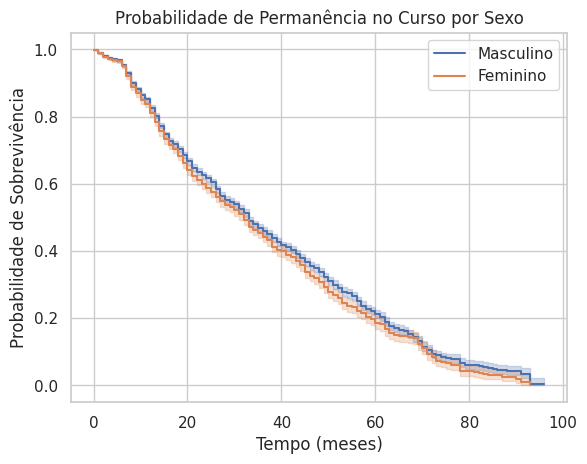

In [ ]:
from lifelines import KaplanMeierFitter
import matplotlib.pyplot as plt

kmf = KaplanMeierFitter()

# Dados para Sexo Masculino
mask_m = df['Sexo_M'] == 1
kmf.fit(durations=df.loc[mask_m, 'MesesMatriculado'], event_observed=df.loc[mask_m, 'evento'], label='Masculino')
ax = kmf.plot_survival_function()

# Dados para Sexo Feminino
mask_f = df['Sexo_M'] == 0
kmf.fit(durations=df.loc[mask_f, 'MesesMatriculado'], event_observed=df.loc[mask_f, 'evento'], label='Feminino')
kmf.plot_survival_function(ax=ax)

plt.title('Probabilidade de Permanência no Curso por Sexo')
plt.xlabel('Tempo (meses)')
plt.ylabel('Probabilidade de Sobrevivência')
plt.show()


In [ ]:
evento = [
    'Abandono/Evasão', 'Cancelamento Voluntário', 'Cancelamento Compulsório',
    'Falecido', 'Transferido Interno', 'Transferido Externo', 'Jubilado'
]

df['evento'] = df['Situação Matrícula'].isin(evento).astype(int)
print(df['evento'].value_counts())


evento
1    8462
0    6125
Name: count, dtype: int64


In [ ]:
df_cox_final.shape

(3433, 14)

In [ ]:
df_cox_final.columns

Index(['MesesMatriculado', 'evento', 'Idade_Ingresso', 'Sexo_M',
       'Turno_Matutino', 'Turno_Noturno', 'Coeficiente_Rendimento',
       'Cor/Raça_Branca', 'Cor/Raça_Indígena',
       'Cor/Raça_Não dispõe da informação',
       'Cor/Raça_Não quis declarar cor/raça', 'Cor/Raça_Parda',
       'Cor/Raça_Preta', 'Grupo_Curso'],
      dtype='object')

In [ ]:
df = pd.get_dummies(df, columns=['Nível/Regime de Ensino'], drop_first=True, prefix_sep='_')


In [ ]:
df.columns

Index(['Desc_Instituicao', 'DESCRICAO_CURSO', 'Desc_Matriz_Curricular',
       'Nivel_Ensino', 'Qtd Períodos', 'Período Atual', 'Turma Atual',
       'Data_Ingresso', 'Desc_Modalidade_Curso', 'Nascimento', 'Naturalidade',
       'Renda Familiar Per Capita', 'Escola de Origem', 'Cidade',
       'Situação Matrícula', 'Último Evento de Matrícula',
       'Sit. Últ. Per. Letivo', 'Coeficiente_Rendimento', 'Dt_Conclusao_Curso',
       'Desc_Estado_Civil', 'MODALIDADE_ENSINO', 'Copia_Dt_Conclusao_Curso',
       'Data_Ultimo_Evento', 'MesesMatriculado', 'evento', 'LimiteMaximoMeses',
       'Sexo_M', 'Turno_Integral', 'Turno_Matutino', 'Turno_Noturno',
       'Turno_Vespertino',
       'Cota_Aluno de Escola Pública com renda <= 1,5 SM por pessoa, autodeclarado preto, pardo ou indígena',
       'Cota_Aluno de Escola Pública com renda > 1,5 SM por pessoa',
       'Cota_Aluno de Escola Pública com renda > 1,5 SM por pessoa, autodeclarado preto, pardo ou indígena',
       'Cota_Aluno de Escola Pú

In [ ]:
# Substituir vírgulas por pontos e converter todas as colunas numéricas
for col in df.columns:
    if df[col].dtype == 'object':
        try:
            df[col] = df[col].str.replace(',', '.', regex=False).astype(float)
        except:
            pass  # Ignora colunas que não são numéricas mesmo


In [ ]:
from lifelines import CoxPHFitter


cols_modelo = ['MesesMatriculado', 'evento', 'Idade_Ingresso', 'Sexo_M', 'Turno_Matutino', 'Turno_Noturno', 'Coeficiente_Rendimento','Cor/Raça_Branca', 'Cor/Raça_Indígena',
       'Cor/Raça_Não dispõe da informação',
       'Cor/Raça_Não quis declarar cor/raça', 'Cor/Raça_Parda',
       'Cor/Raça_Preta', 'Nível/Regime de Ensino_Integrado',
       'Nível/Regime de Ensino_Licenciatura Plena',
       'Nível/Regime de Ensino_Subseqüente',
       'Nível/Regime de Ensino_Tecnólogo']

df_cox_final = df[cols_modelo].dropna()

cph = CoxPHFitter()
cph.fit(df_cox_final, duration_col='MesesMatriculado', event_col='evento')
cph.print_summary()


<lifelines.CoxPHFitter: fitted with 14587 total observations, 6125 right-censored observations>
             duration col = 'MesesMatriculado'
                event col = 'evento'
      baseline estimation = breslow
   number of observations = 14587
number of events observed = 8462
   partial log-likelihood = -69634.56
         time fit was run = 2025-07-19 20:18:25 UTC

---
                                           coef exp(coef)  se(coef)  coef lower 95%  coef upper 95% exp(coef) lower 95% exp(coef) upper 95%
covariate                                                                                                                                  
Idade_Ingresso                            -0.01      0.99      0.00           -0.01           -0.01                0.99                0.99
Sexo_M                                    -0.14      0.87      0.02           -0.18           -0.09                0.83                0.91
Turno_Matutino                             0.19      1.21      0.03            0.13            0.24                1.14                1.27
Turno_Noturno                             -0.00      1.00      0.03           -0.06            0.05                0.94                1.05
Coeficiente_Rendimento                    -0.35      0.70      0.00           -0.36           -0.34                0.70                0.71
Cor/Raça_Branca                           -0.11      0.90      0.10           -0.31            0.09                0.74                1.09
Cor/Raça_Indígena                          0.23      1.26      0.24           -0.24            0.70                0.79                2.01
Cor/Raça_Não dispõe da informação         -0.01      0.99      0.10           -0.21            0.18                0.81                1.20
Cor/Raça_Não quis declarar cor/raça        0.05      1.05      0.15           -0.25            0.35                0.78                1.41
Cor/Raça_Parda                            -0.12      0.89      0.10           -0.31            0.07                0.73                1.08
Cor/Raça_Preta                            -0.14      0.87      0.10           -0.34            0.06                0.71                1.07
Nível/Regime de Ensino_Integrado           0.03      1.03      0.15           -0.26            0.32                0.77                1.38
Nível/Regime de Ensino_Licenciatura Plena  0.43      1.53      0.16            0.11            0.74                1.11                2.11
Nível/Regime de Ensino_Subseqüente         0.33      1.39      0.15            0.04            0.62                1.05                1.86
Nível/Regime de Ensino_Tecnólogo           0.01      1.01      0.15           -0.28            0.30                0.75                1.35

                                           cmp to      z      p  -log2(p)
covariate                                                                
Idade_Ingresso                               0.00  -5.99 <0.005     28.86
Sexo_M                                       0.00  -5.76 <0.005     26.82
Turno_Matutino                               0.00   6.75 <0.005     36.01
Turno_Noturno                                0.00  -0.09   0.93      0.11
Coeficiente_Rendimento                       0.00 -77.18 <0.005       inf
Cor/Raça_Branca                              0.00  -1.09   0.27      1.86
Cor/Raça_Indígena                            0.00   0.95   0.34      1.55
Cor/Raça_Não dispõe da informação            0.00  -0.12   0.90      0.15
Cor/Raça_Não quis declarar cor/raça          0.00   0.31   0.76      0.40
Cor/Raça_Parda                               0.00  -1.22   0.22      2.17
Cor/Raça_Preta                               0.00  -1.33   0.18      2.46
Nível/Regime de Ensino_Integrado             0.00   0.19   0.85      0.24
Nível/Regime de Ensino_Licenciatura Plena    0.00   2.62   0.01      6.83
Nível/Regime de Ensino_Subseqüente           0.00   2.27   0.02      5.41
Nível/Regime de Ensino_Tecnólogo             0.00   0.05 

In [ ]:
cols_modelo = ['MesesMatriculado', 'evento', 'Idade_Ingresso', 'Sexo_M', 'Turno_Matutino', 'Turno_Noturno', 'Coeficiente_Rendimento']
df[cols_modelo].isnull().sum()


,0
MesesMatriculado,0
evento,0
Idade_Ingresso,0
Sexo_M,0
Turno_Matutino,0
Turno_Noturno,0
Coeficiente_Rendimento,0


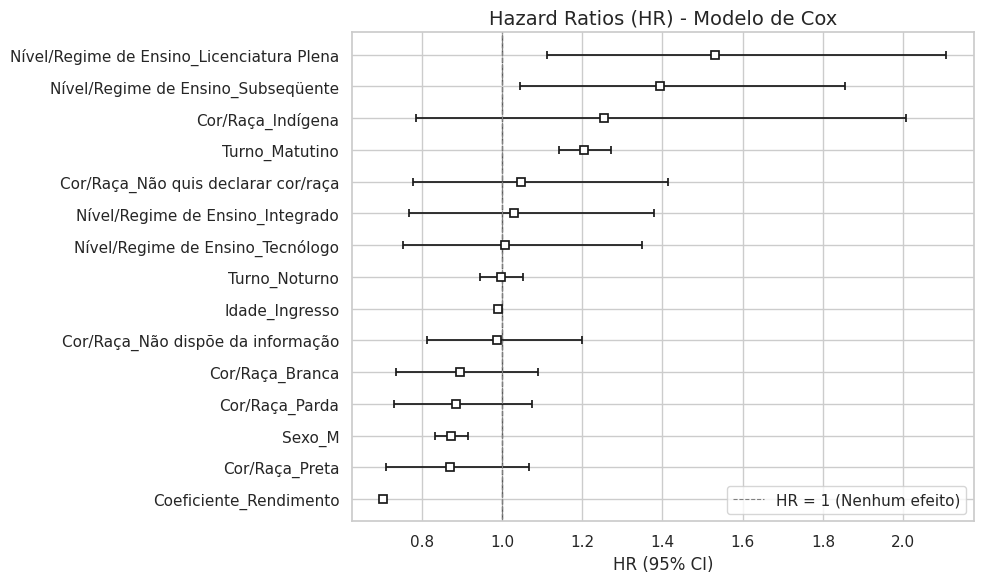

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
from lifelines import CoxPHFitter

# Estilo visual
sns.set(style="whitegrid")

# Ajustar o modelo
cph = CoxPHFitter()
cph.fit(df_cox_final, duration_col='MesesMatriculado', event_col='evento')

# Plotar Forest Plot

fig, ax = plt.subplots(figsize=(10, 6))
cph.plot(hazard_ratios=True, ax=ax)
ax.set_title("Hazard Ratios (HR) - Modelo de Cox", fontsize=14)
plt.tight_layout()
plt.axvline(x=1, color='gray', linestyle='--', linewidth=0.8, label='HR = 1 (Nenhum efeito)')
plt.legend()
plt.show()


In [ ]:
df.to_csv('df_cox_final.csv', index=False)

In [ ]:
df.shape

(14587, 65)

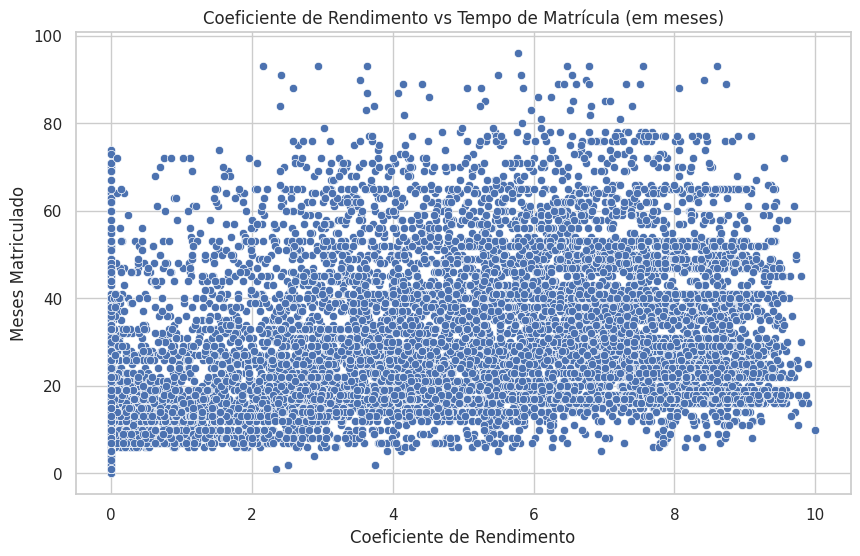

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='Coeficiente_Rendimento', y='MesesMatriculado')
plt.title('Coeficiente de Rendimento vs Tempo de Matrícula (em meses)')
plt.xlabel('Coeficiente de Rendimento')
plt.ylabel('Meses Matriculado')
plt.show()


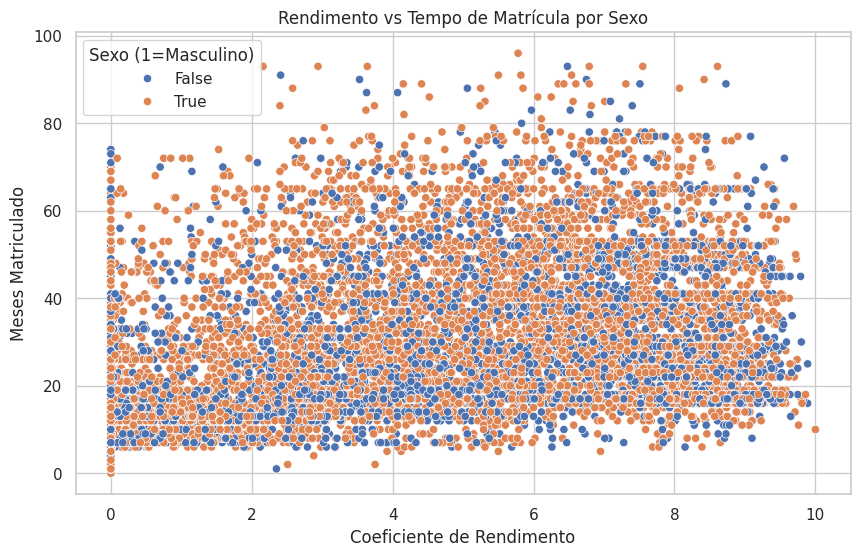

In [ ]:
plt.figure(figsize=(10, 6))
sns.scatterplot(
    data=df,
    x='Coeficiente_Rendimento',
    y='MesesMatriculado',
    hue='Sexo_M'
)
plt.title('Rendimento vs Tempo de Matrícula por Sexo')
plt.xlabel('Coeficiente de Rendimento')
plt.ylabel('Meses Matriculado')
plt.legend(title='Sexo (1=Masculino)')
plt.show()


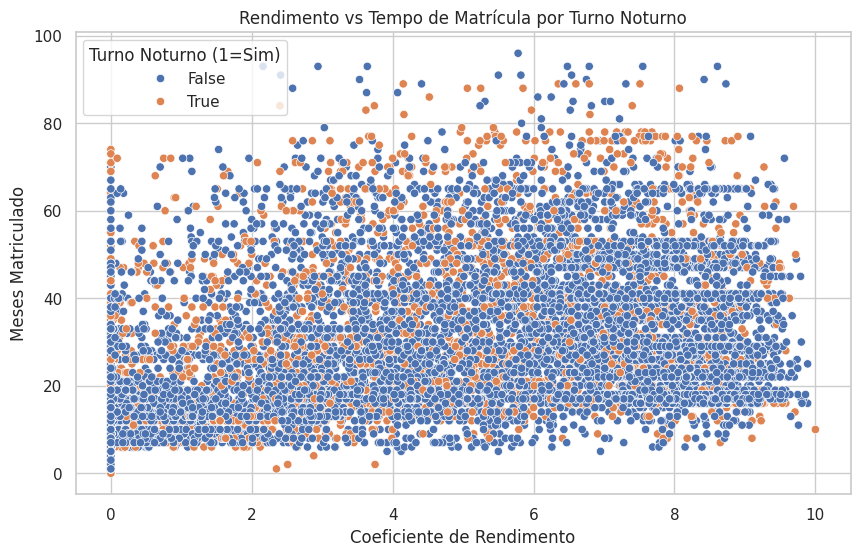

In [ ]:
plt.figure(figsize=(10, 6))
sns.scatterplot(
    data=df,
    x='Coeficiente_Rendimento',
    y='MesesMatriculado',
    hue='Turno_Noturno'
)
plt.title('Rendimento vs Tempo de Matrícula por Turno Noturno')
plt.xlabel('Coeficiente de Rendimento')
plt.ylabel('Meses Matriculado')
plt.legend(title='Turno Noturno (1=Sim)')
plt.show()


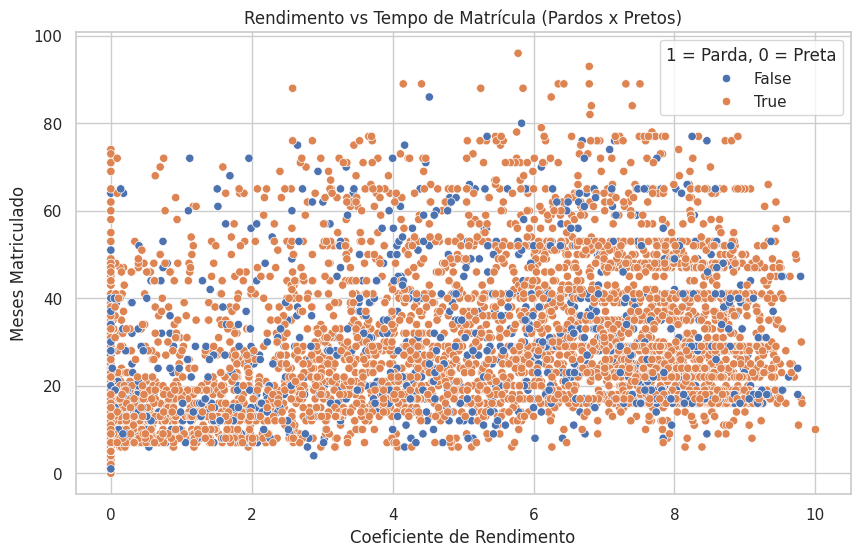

In [ ]:
plt.figure(figsize=(10, 6))
sns.scatterplot(
    data=df[(df['Cor/Raça_Parda'] == 1) | (df['Cor/Raça_Preta'] == 1)],
    x='Coeficiente_Rendimento',
    y='MesesMatriculado',
    hue='Cor/Raça_Parda'
)
plt.title('Rendimento vs Tempo de Matrícula (Pardos x Pretos)')
plt.xlabel('Coeficiente de Rendimento')
plt.ylabel('Meses Matriculado')
plt.legend(title='1 = Parda, 0 = Preta')
plt.show()


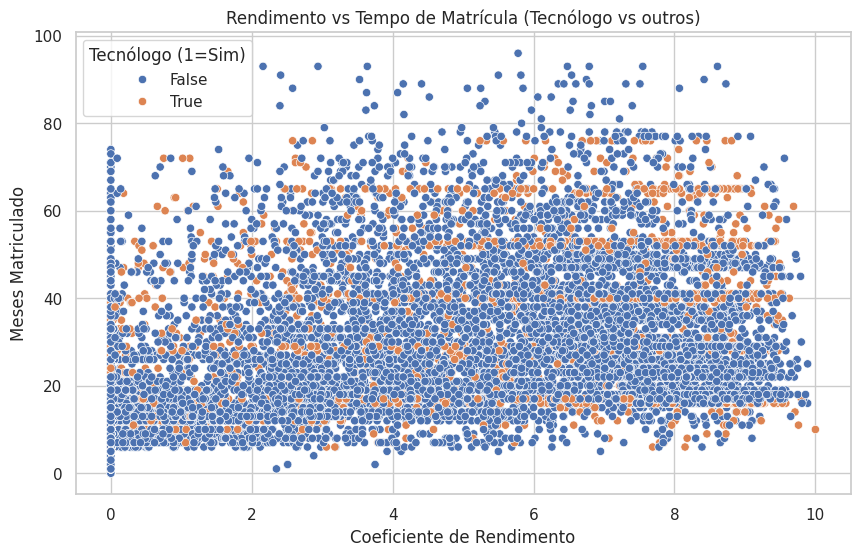

In [ ]:
plt.figure(figsize=(10, 6))
sns.scatterplot(
    data=df,
    x='Coeficiente_Rendimento',
    y='MesesMatriculado',
    hue='Nível/Regime de Ensino_Tecnólogo'
)
plt.title('Rendimento vs Tempo de Matrícula (Tecnólogo vs outros)')
plt.xlabel('Coeficiente de Rendimento')
plt.ylabel('Meses Matriculado')
plt.legend(title='Tecnólogo (1=Sim)')
plt.show()


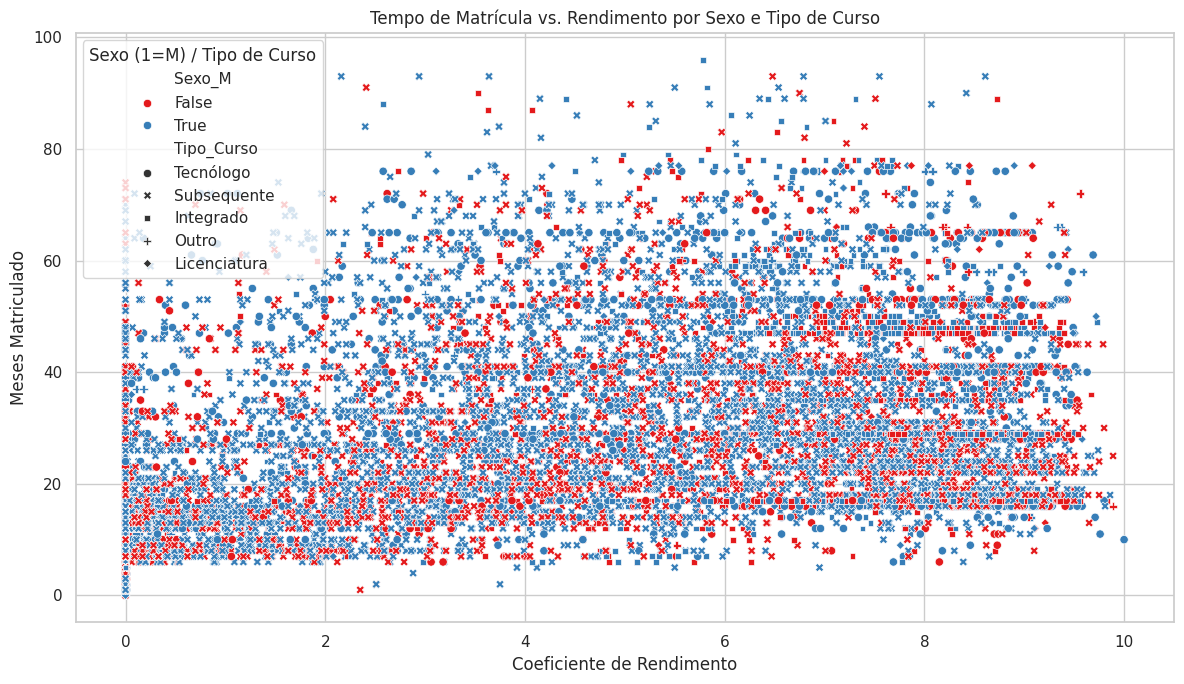

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Criando uma nova coluna de curso (uma string com nome)
def identificar_curso(row):
    if row['Nível/Regime de Ensino_Integrado'] == 1:
        return 'Integrado'
    elif row['Nível/Regime de Ensino_Licenciatura Plena'] == 1:
        return 'Licenciatura'
    elif row['Nível/Regime de Ensino_Subseqüente'] == 1:
        return 'Subsequente'
    elif row['Nível/Regime de Ensino_Tecnólogo'] == 1:
        return 'Tecnólogo'
    else:
        return 'Outro'

df['Tipo_Curso'] = df.apply(identificar_curso, axis=1)

# Criando o gráfico
plt.figure(figsize=(12, 7))
sns.scatterplot(
    data=df,
    x='Coeficiente_Rendimento',
    y='MesesMatriculado',
    hue='Sexo_M',            # 1 = masculino, 0 = feminino
    style='Tipo_Curso',      # Diferenciar os tipos de curso
    palette='Set1'
)

plt.title('Tempo de Matrícula vs. Rendimento por Sexo e Tipo de Curso')
plt.xlabel('Coeficiente de Rendimento')
plt.ylabel('Meses Matriculado')
plt.legend(title='Sexo (1=M) / Tipo de Curso')
plt.grid(True)
plt.tight_layout()
plt.show()


In [ ]:
variaveis = [
    'Idade_Ingresso', 'Sexo_M', 'Turno_Matutino', 'Turno_Noturno',
    'Coeficiente_Rendimento', 'Cor/Raça_Branca', 'Cor/Raça_Indígena',
    'Cor/Raça_Não dispõe da informação', 'Cor/Raça_Não quis declarar cor/raça',
    'Cor/Raça_Parda', 'Cor/Raça_Preta', 'Nível/Regime de Ensino_Integrado',
    'Nível/Regime de Ensino_Licenciatura Plena', 'Nível/Regime de Ensino_Subseqüente',
    'Nível/Regime de Ensino_Tecnólogo'
]

for var in variaveis:
    print(f"\n=== {var} ===")
    print(df[var].value_counts(dropna=False))  # Frequência absoluta (inclusive NaN)
    print(df[var].value_counts(normalize=True, dropna=False).apply(lambda x: f"{x*100:.2f}%"))  # Percentual
    print(f"Total de valores nulos: {df[var].isna().sum()} de {len(df)}")



=== Idade_Ingresso ===
Idade_Ingresso
 19    1729
 18    1719
 20    1265
 16    1203
 15    1148
       ... 
 13       1
 69       1
 70       1
-1        1
 2        1
Name: count, Length: 68, dtype: int64
Idade_Ingresso
 19    11.85%
 18    11.78%
 20     8.67%
 16     8.25%
 15     7.87%
        ...  
 13     0.01%
 69     0.01%
 70     0.01%
-1      0.01%
 2      0.01%
Name: proportion, Length: 68, dtype: object
Total de valores nulos: 0 de 14587

=== Sexo_M ===
Sexo_M
True     9808
False    4779
Name: count, dtype: int64
Sexo_M
True     67.24%
False    32.76%
Name: proportion, dtype: object
Total de valores nulos: 0 de 14587

=== Turno_Matutino ===
Turno_Matutino
False    9711
True     4876
Name: count, dtype: int64
Turno_Matutino
False    66.57%
True     33.43%
Name: proportion, dtype: object
Total de valores nulos: 0 de 14587

=== Turno_Noturno ===
Turno_Noturno
False    10759
True      3828
Name: count, dtype: int64
Turno_Noturno
False    73.76%
True     26.24%
Name: proporti

# Por nivel de ensino

In [ ]:
df_superiores = df[df['Desc_Modalidade_Curso'].isin(['Tecnólogo', 'Bacharelado', 'Licenciatura'])].copy()


In [ ]:
df['Grupo_Curso'] = np.where(
    df['Desc_Modalidade_Curso'].isin(['Tecnólogo', 'Bacharelado', 'Licenciatura']),
    'Curso Superior',
    'Curso Técnico'
)


In [ ]:
df['Grupo_Curso'].value_counts()

,count
Grupo_Curso,
Curso Técnico,11154
Curso Superior,3433


In [ ]:
colunas_modelo = [
    'MesesMatriculado',
    'evento',
    'Idade_Ingresso',
    'Coeficiente_Rendimento',
    'Sexo_M',          # se tiver usado get_dummies
    'Turno_Matutino',
    'Turno_Noturno','Cor/Raça_Branca', 'Cor/Raça_Indígena',
       'Cor/Raça_Não dispõe da informação',
       'Cor/Raça_Não quis declarar cor/raça', 'Cor/Raça_Parda',
       'Cor/Raça_Preta'
    # você pode incluir outras se quiser, como cor/raça
]
df_modelo = df_superiores[colunas_modelo].dropna()


In [ ]:
from lifelines import CoxPHFitter

cph = CoxPHFitter()
cph.fit(df_modelo, duration_col='MesesMatriculado', event_col='evento')
cph.print_summary()


<lifelines.CoxPHFitter: fitted with 3433 total observations, 1774 right-censored observations>
             duration col = 'MesesMatriculado'
                event col = 'evento'
      baseline estimation = breslow
   number of observations = 3433
number of events observed = 1659
   partial log-likelihood = -11203.94
         time fit was run = 2025-07-19 20:20:11 UTC

---
                                     coef exp(coef)  se(coef)  coef lower 95%  coef upper 95% exp(coef) lower 95% exp(coef) upper 95%
covariate                                                                                                                            
Idade_Ingresso                      -0.02      0.98      0.00           -0.02           -0.01                0.98                0.99
Coeficiente_Rendimento              -0.40      0.67      0.01           -0.42           -0.38                0.66                0.69
Sexo_M                              -0.19      0.82      0.06           -0.31           -0.08                0.74                0.92
Turno_Matutino                       0.59      1.80      0.08            0.43            0.74                1.54                2.10
Turno_Noturno                        0.22      1.24      0.08            0.06            0.37                1.06                1.45
Cor/Raça_Branca                     -0.27      0.77      0.29           -0.84            0.31                0.43                1.36
Cor/Raça_Indígena                   -0.40      0.67      0.48           -1.34            0.53                0.26                1.70
Cor/Raça_Não dispõe da informação    0.12      1.12      0.29           -0.46            0.69                0.63                2.00
Cor/Raça_Não quis declarar cor/raça -0.25      0.78      0.36           -0.96            0.45                0.38                1.57
Cor/Raça_Parda                      -0.29      0.75      0.29           -0.86            0.28                0.42                1.33
Cor/Raça_Preta                      -0.37      0.69      0.30           -0.95            0.22                0.38                1.24

                                     cmp to      z      p  -log2(p)
covariate                                                          
Idade_Ingresso                         0.00  -5.00 <0.005     20.72
Coeficiente_Rendimento                 0.00 -38.14 <0.005       inf
Sexo_M                                 0.00  -3.33 <0.005     10.14
Turno_Matutino                         0.00   7.47 <0.005     43.53
Turno_Noturno                          0.00   2.69   0.01      7.11
Cor/Raça_Branca                        0.00  -0.91   0.36      1.46
Cor/Raça_Indígena                      0.00  -0.85   0.40      1.34
Cor/Raça_Não dispõe da informação      0.00   0.39   0.70      0.52
Cor/Raça_Não quis declarar cor/raça    0.00  -0.70   0.48      1.05
Cor/Raça_Parda                         0.00  -0.99   0.32      1.64
Cor/Raça_Preta                         0.00  -1.24   0.22      2.21
---
Concordance = 0.83
Partial AIC = 22429.88
log-likelihood ratio test = 2075.96 on 11 df
-log2(p) of ll-ratio test = inf

In [ ]:
df_modelo.columns

Index(['MesesMatriculado', 'evento', 'Idade_Ingresso',
       'Coeficiente_Rendimento', 'Sexo_M', 'Turno_Matutino', 'Turno_Noturno'],
      dtype='object')

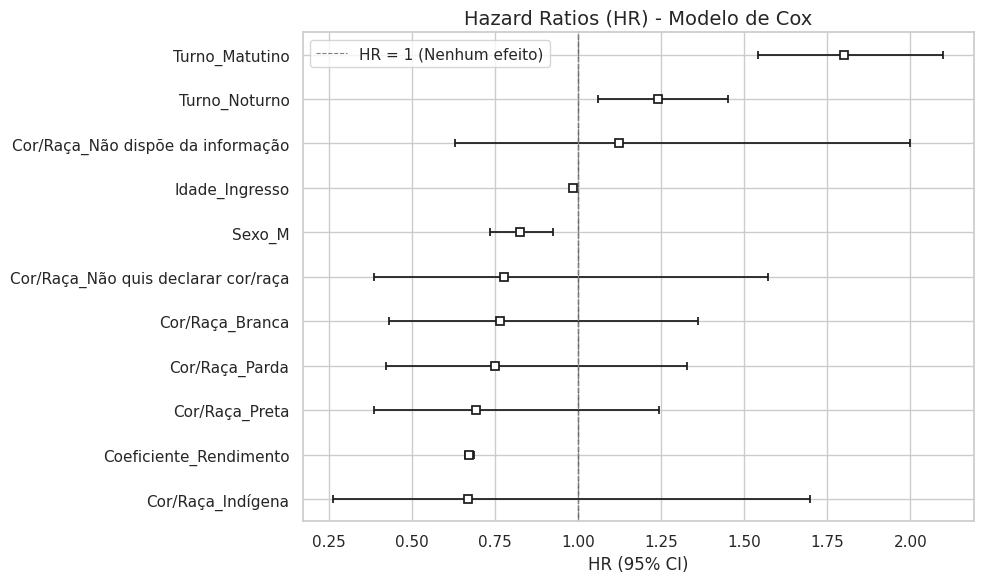

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
from lifelines import CoxPHFitter

# Estilo visual
sns.set(style="whitegrid")

# Ajustar o modelo
cph = CoxPHFitter()
cph.fit(df_modelo, duration_col='MesesMatriculado', event_col='evento')

# Plotar Forest Plot

fig, ax = plt.subplots(figsize=(10, 6))
cph.plot(hazard_ratios=True, ax=ax)
ax.set_title("Hazard Ratios (HR) - Modelo de Cox", fontsize=14)
plt.tight_layout()
plt.axvline(x=1, color='gray', linestyle='--', linewidth=0.8, label='HR = 1 (Nenhum efeito)')
plt.legend()
plt.show()